## 2020 0520 WED
#### TF(Term Frequency) : 문서내에서 특정한 단어가 얼마나 자주 등장하는지!

#### IDF : 문서군내에서 DF(Document Frequency) 가 자주 나온다면 그 단어의 중요도가 떨어지는 것이다. 그래서 DF의 반대는 IDF로 단어가 자주 나오지 않는 것이다. TF * IDF는  특정한 단어가 자주 나온다면 그 단어의 중심어를 나타낸다.

#### TF 가 높고, DF가 IDF가 낮은것이 그 단어의 키워드 즉 중심어가 되는 것이다.

### 군집 분석
* 유사한 데이터를 묶어주는 분석
   * 예) 서로 다른 주제를 지닌 대량의 뉴스기사들이 있다고 가정했을 때 연구자가 유사한 주제들의 문서끼리 묶어서 보고 싶을 경우
   * 예) 유사한 문서들끼리 묶어진 이후에는 해당 군집에 대하여 깊이 있는 분석을 수행하여 특정 주제나 성격을 지닌 문서들을 심층적으로 파고들 수 있음
* 방법
   * 분할 군집 분석 
   * 구조적 군집 분석

In [1]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    java_path = 'C:/Program Files/Java/jdk-14.0.1/bin'
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

C:\Program Files\Java\jdk1.8.0_191


### 분할 군집 분석
* 가장 단순하면서도 가장 널리 사용되는 방식
* 데이터를 k개의 배타적인 집단으로 나누는데 이 때 군집 숫자 k개는 배경 지식을 통해 결정된다고 가정
* k를 어떻게 지정할지 고민된다면 이를 해결해줄 수 있는 수학, 통계적인 방법들을 이용
   * 예) silhouette, elbow 방법

### K-평균 군집 분석
* 알고리즘
   * 전체 데이터 세트에서 임의로 k개의 오브젝트를 선택해서 군집의 초기 중앙점으로 삼음
   * 나머지 오브젝트 각각에 대해 거리를 바탕으로 k개의 군집 중에서 가장 가까운 군집을 찾아 그 안에 포함시킨 후, 반복적으로 군집 내부 편차를 향상시킴
   * 모든 군집에 대해 직전 반복까지 포함시킨 오브젝트를 통해 새로운 중심을 계산하고 새로 계산한 군집 중심을 바탕으로 오브젝트 군집을 재배치함
   * 위 과정을 수렴할 때까지 계속 반복함
* 주로 유클리디안 기하 거리를 이용하나 코사인 유사도를 이용한 거리가 효과적임
* 텍스트 마이닝의 경우, 문서의 단어 빈도 혹은 TF-IDF와 같은 가중치가 문서 A, B의 벡터를 들어감
* TF-IDF
   * TF-IDF는 텍스트 마이닝에 이용되는 대표적인 가중치로 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치
   * TF(term frequency): 특정한 단어가 문서 내에서 얼마나 자주 등장하는지를 나타낸 값
   * DF(document frequency): 해당 단어가 문서군 내에서 얼마나 자주 사용되는지 나타내는 지표로 단어가 흔  하게 등장할수록 중요한 단어가 아니라고 볼 수 있음
   * 예) 신문기사 1,000개를 전체 문서군으로 봤을 때 '기자'라는 단어는 1,000개의 문서 모두에 등장하기 때문에 DF 수치가 매우 높을 것임. 또한, '기자'라는 단어 자체는 흔하기 때문에 특징이 되는 주요 단어라고 볼 수 없을 것임. 따라서 DF의 역수인 IDF(inverse document frequency)를 구하고 TF와 IDF의 값을 곱한 TF-IDF 수치를 산출함
* 관련 라이브러리 인스톨
   * pip install sklearn

In [2]:
# K-평균 군집 분석
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [5]:
hannanum = Hannanum()
Data = pd.read_csv('C:/Users/330-15/Desktop/20_1_computer/tmwithpython/군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [21]:
# 한나눔 형태소 분석기로 명사만 추출
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

# print(docs)

In [22]:
# 명사들을 띄어쓰기로 붙여서 열거
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
# print (docs)

#### BOW(Bag of Words) : 문서를 숫자 벡터로 변환하는 가장 기본적인 방법이다. 전체 문서 {d1, d2 ... dn}를 구성하는 고정된 단어장 {t1,t2 ... tn}을 만들고 di라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.
* Xij = 문서 di내의 단어 tj의 출현 빈도
* xij => 0, 만약 단어 tj가 문서 di안에 없으면, 1 만약 단어 tj가 문서 di안에 있으면

#### Scikit-Learn => CountVectorizer
* 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다.
   1. 문서를 토큰 리스트로 변환한다. 
   2. 각 문서에서 토큰의 출현 빈도를 센다.
   3. 각 문서를 BOW 인코딩 벡터로 변환한다.
   
#### fit_transform(docs)는 Vectorization 시키는 함수이다. => list 형태의 문자열 받는다.

In [26]:
# 문서-단어 메트릭스 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [15]:
kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [19]:
# PCA 기법으로 차원을 2차원으로 축소한 후 군집 결과를 시각화
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents,
                          columns=['principal component 1', 'principal component 2'])
principalDf.index = Data['검색어']
principalDf

,principal component 1,principal component 2
검색어,,
유한양행,-2.245407,-4.167456
유한양행,-3.613952,-9.898561
유한양행,-2.932635,-7.159363
유한양행,-2.142773,-3.757117
유한양행,-3.397879,-8.904298
라돈,-3.456162,0.931168
라돈,-4.172639,2.527030
라돈,-6.418892,7.240863
라돈,-7.928539,10.011247


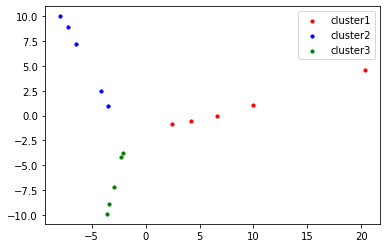

In [20]:
plt.scatter(principalDf.iloc[kmeans.labels_==0, 0], 
            principalDf.iloc[kmeans.labels_==0, 1], 
            s=10, c='red', label='cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_==1, 0], 
            principalDf.iloc[kmeans.labels_==1, 1], 
            s=10, c='blue', label='cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_==2, 0], 
            principalDf.iloc[kmeans.labels_==2, 1], 
            s=10, c='green', label='cluster3')
plt.legend()
